In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from tensorflow.keras.models import Sequential #for neural network models
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from tensorflow.keras.utils import to_categorical #For One-hot Encoding
from tensorflow.keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Checking datasets
import os
paths = os.listdir(path="sample")

In [3]:
path_train = "sample/train"
path_val   = "sample/val"
path_test  = "sample/test"

In [4]:
img = glob(path_train+"/PNEUMONIA/*.jpeg") #Getting all images in this folder

In [5]:
img = np.asarray(plt.imread(img[0]))

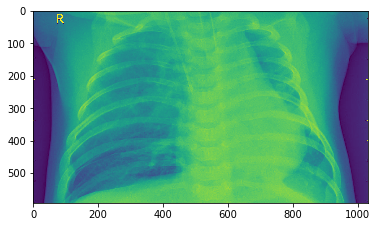

In [6]:
plt.imshow(img)

In [7]:
img.shape #Checking the shape of this image. It seems like a two deminsional shape (1422 x 1152)

(592, 1032)

In [8]:
img = glob(path_train+"/NORMAL/*.jpeg") #Getting all images in this folder

In [9]:
img = np.asarray(plt.imread(img[0]))

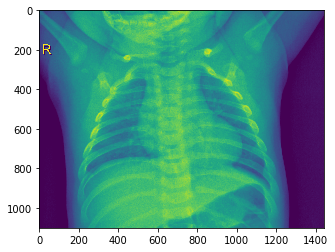

In [10]:
plt.imshow(img)

In [11]:
img.shape

(1101, 1442)

In [12]:
#Data preprocessing and analysis
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [13]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches   = data_gen.flow_from_directory(path_val,   target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches  = data_gen.flow_from_directory(path_test,  target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 150 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [14]:
train_batches.image_shape

(226, 226, 3)

In [15]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     7

In [17]:
optimizer = Adam(lr = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit_generator(epochs=5, 
                              callbacks=[early_stopping_monitor], 
                              shuffle=True, 
                              validation_data=val_batches, 
                              generator=train_batches, 
                              steps_per_epoch=100, 
                              validation_steps=2,
                              verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 2 steps
Epoch 1/2
  5/100 [>.............................] - ETA: 11:19 - loss: 1.1131 - accuracy: 0.4800WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 200 batches). You may need to use the repeat() function when building your dataset.


In [18]:
prediction = model.predict_generator(generator=train_batches, verbose=1, steps=100)

Instructions for updating:
Please use Model.predict, which supports generators.
  5/100 [>.............................] - ETA: 2:43WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 100 batches). You may need to use the repeat() function when building your dataset.


In [19]:
'''
Source: Jason Brownlee
Site: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

KeyError: 'acc'

In [ ]:
'''
Source: Jason Brownlee
Site: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()